In [4]:
import matplotlib.pyplot as plt
import numpy as np
from hyperparams import Hyperparams as hps
from dataset2 import LJSpeech_Dataset, collate_fn
import torch

In [28]:
import utils

In [29]:
path = 'Data/LJSpeech-1.1/'

In [40]:
data = LJSpeech_Dataset(path + 'metadata.csv', path + 'wavs', do_bucket=True, batch_size=16)

In [42]:
data[0]['text'].size()

torch.Size([16, 20])

In [43]:
batch = data[0]['text']

In [44]:
from modules import *
from network import *

In [45]:
ch_en = CharEmbedding(len(hps.char_set), hps.embed_size)

In [52]:
x = ch_en(batch)
x.size()

torch.Size([16, 20, 256])

In [53]:
pre_en = Prenet(256, 128, 128, 0.5)

In [54]:
y = pre_en(x)
y.size()

torch.Size([16, 20, 128])

In [58]:
torch.cat([torch.zeros(32, 128, 20) for _ in range(5)], dim=1).size()

torch.Size([32, 640, 20])

In [63]:
x = torch.zeros(32, 200, 20)

In [73]:
torch.zeros(x[:, :1, :].size()).size()

torch.Size([32, 1, 20])

In [72]:
torch.cat([x, x], dim =1).size()

torch.Size([32, 400, 20])

In [75]:
a = np.array([-0.3841,  0.6320,  0.4254, -0.7384])
np.mean(a)

-0.016274999999999984

In [17]:
len(data[13089-1]['text'][18])

190

In [23]:
for x in data.txt_list[:58]:
    print(len(x), x)

11 answer yes.
12 eyewitnesses
13 in some yards
13 gene c. akin 
13 marina oswald
14 in his defense
14 after a little
14 he said quote 
15 let us pass on.
15 hardly any one.
15 one was askern 
15 as time passed 
15 in six oh five 
15 nabonidus fled.
15 fibers on rifle
15 location of bag
15 oswald's jacket
15 oswald's arrest
15 the early years
15 pic said quote 
15 she said quote 
16 on the contrary 
16 st. jerome said 
16 oswald at window
16 two young women 
16 joseph d. nicol 
16 interest in cuba
16 recommendations.
17 they go on to say
17 ten were executed
17 the assassination
17 the taxicab ride.
17 oswald's revolver
17 leon f. czolgosz 
18 still he resisted.
18 the elder brother 
18 as a special favor
18 the soldiers then?
18 breakfast biscuit.
18 we have therefore 
18 lee harvey oswald.
18 taken from oswald.
18 accuracy of weapon
18 personal relations
18 for the first time
19 by degrees however 
19 jewels were re set 
19 he had disappeared.
19 and after sentence.
19 come along gal

In [24]:
for x in data[200]['text']:
    sent = ''
    for c in x.numpy():
        sent += hps.char_set[c]
    print(len(x), sent)

40 a taste for spirits. end quote.EPPPPPPPP
40 i believe it will be.EPPPPPPPPPPPPPPPPPP
40 her captain was john smith EPPPPPPPPPPPP
40 to the time of the assassination.EPPPPPP
40 in his testimony before the commission E
40 to a walking pace or stopped EPPPPPPPPPP
40 we must continue to protect children EPP
40 when cases of this kind occur EPPPPPPPPP
40 in their tenth reportEPPPPPPPPPPPPPPPPPP
40 his features have no felonious cast EPPP
40 in one of them he says EPPPPPPPPPPPPPPPP
40 at any time while in travel status.EPPPP
40 that situation however was short lived E
40 to the value of twenty thousand pounds.E
40 when that time arrivesEPPPPPPPPPPPPPPPPP
40 i sincerely hope that as a resultEPPPPPP
40 fbi and the secret service.EPPPPPPPPPPPP
40 the whole about fifteen feet wide.EPPPPP
40 from august nineteen sixty twoEPPPPPPPPP
40 eight. the press yard.EPPPPPPPPPPPPPPPPP
40 tarpey was caught through his wife EPPPP
40 the duchess of kent.EPPPPPPPPPPPPPPPPPPP
40 a milliner's porter EPPPPPPPP

In [10]:
len(data[13089-1]['text'])

19

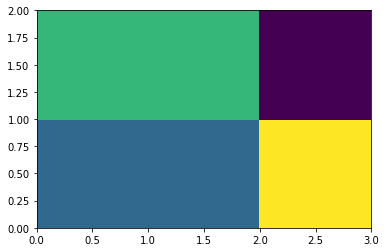

In [26]:
plt.pcolormesh([[1,1,3], 
                [2,2, 0]])
plt.show()

In [11]:
L = []
for txt in data.txt_list:
    L.append(len(txt))
L = np.array(L)

In [40]:
import math
math.ceil(0.5)

1

In [33]:
import random
a = random.sample([100, 123, 444], k=3)
a += [1]
a

[123, 444, 100, 1]

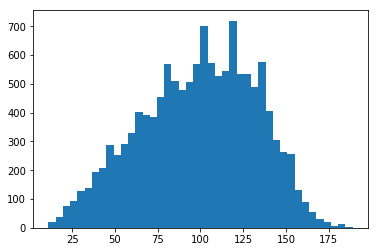

[[0, 20],
 [20, 40],
 [40, 60],
 [60, 80],
 [80, 100],
 [100, 120],
 [120, 140],
 [140, 160],
 [160, 180],
 [180, 200]]

In [48]:
bucket_size = 20
b = [[i*bucket_size, (i+1)*bucket_size] for i in range(math.ceil(max(L)/bucket_size))]
plt.hist(L, bins='auto')
plt.show()
b

In [42]:
a = [0 for _ in range(len(b))]
for l in L:
    for k in range(len(b)):
        if b[k][0] <= l < b[k][1]:
            a[k] += 1
print(a)

[58, 576, 1252, 1922, 2509, 2808, 2498, 1247, 200, 19]


In [12]:
import random
random.sample(range(10), k=10)

[1, 2, 5, 6, 4, 0, 9, 3, 8, 7]

In [15]:
idx = 10000
mag = data[idx]['mag']
text = data[idx]['text']
text

'the arresting officers found a forged selective service card with a picture of oswald and the name alek j. hidell '

In [16]:
wav = utils.mag2wav(mag)

In [17]:
import IPython
IPython.display.Audio(wav, rate=22050)

In [7]:
input_torch = torch.LongTensor([input])
input_torch.size()

torch.Size([1, 127])

In [73]:
from torch.utils.data import DataLoader, Dataset

In [74]:
from network import *
from modules import *

loader = DataLoader(data, batch_size=16, collate_fn=collate_fn)
model = Tacotron()

In [49]:
for i, d in enumerate(loader):
    print(d['text'].size())
    print(d['mel'].size())
    break
    

torch.Size([16, 168])
torch.Size([16, 800, 80])


In [71]:
# d['text']
vocab_size = len(hps.char_set)
embed_size = hps.embed_size
embed = CharEmbedding(vocab_size, embed_size)
prenet = Prenet(
            input_size=embed_size,
            hidden_size=hps.prenet_size[0],
            output_size=embed_size // 2,
            dropout_rate=hps.prenet_dropout_rate)
CBHG = Encoder_CBHG(
            K=hps.K_encoder,
            input_size=embed_size // 2,
            hidden_size=embed_size // 2)
en = Encoder(len(hps.char_set), hps.embed_size)
en(d['text']).size()

torch.Size([16, 168, 256])

In [75]:
y = embed(d['text'])
print(y.size())

torch.Size([16, 168, 256])


In [76]:
y = prenet(y)
print(y.size())

torch.Size([16, 168, 128])


In [77]:
y = CBHG(y)
y.size()

torch.Size([16, 168, 256])

In [78]:
de_mel = Decoder_Mel(80, 256, 256, reduction_factor=5)

In [ ]:
de_mel()

In [79]:
T = Tacotron()

In [83]:
for n, p in T.named_parameters():
    if p.requires_grad:
        print(n)

encoder.embed.net.weight
encoder.prenet.net.fc1.weight
encoder.prenet.net.fc1.bias
encoder.prenet.net.fc2.weight
encoder.prenet.net.fc2.bias
encoder.CBHG.conv_bank.0.net.weight
encoder.CBHG.conv_bank.0.net.bias
encoder.CBHG.conv_bank.1.net.weight
encoder.CBHG.conv_bank.1.net.bias
encoder.CBHG.conv_bank.2.net.weight
encoder.CBHG.conv_bank.2.net.bias
encoder.CBHG.conv_bank.3.net.weight
encoder.CBHG.conv_bank.3.net.bias
encoder.CBHG.conv_bank.4.net.weight
encoder.CBHG.conv_bank.4.net.bias
encoder.CBHG.conv_bank.5.net.weight
encoder.CBHG.conv_bank.5.net.bias
encoder.CBHG.conv_bank.6.net.weight
encoder.CBHG.conv_bank.6.net.bias
encoder.CBHG.conv_bank.7.net.weight
encoder.CBHG.conv_bank.7.net.bias
encoder.CBHG.conv_bank.8.net.weight
encoder.CBHG.conv_bank.8.net.bias
encoder.CBHG.conv_bank.9.net.weight
encoder.CBHG.conv_bank.9.net.bias
encoder.CBHG.conv_bank.10.net.weight
encoder.CBHG.conv_bank.10.net.bias
encoder.CBHG.conv_bank.11.net.weight
encoder.CBHG.conv_bank.11.net.bias
encoder.CBHG.co

In [9]:
a1 = np.array([1e-3 * 0.99**i for i in range(50)])
a2 = np.array([1e-3 * 0.999**i for i in range(50)])

In [32]:
# init_lr * warmup_steps ** 0.5 * tf.minimum(step * warmup_steps ** -1.5, step ** -0.5)

# step = np.arange(1, 100)
a1 = [0.001 * 4000 ** 0.5 * min(i * (4000 ** -1.5), i ** -0.5) for i in range(1, 10000)]

In [48]:
for x in a1:
    print('{:.3e}'.format(x))

2.500e-07
5.000e-07
7.500e-07
1.000e-06
1.250e-06
1.500e-06
1.750e-06
2.000e-06
2.250e-06
2.500e-06
2.750e-06
3.000e-06
3.250e-06
3.500e-06
3.750e-06
4.000e-06
4.250e-06
4.500e-06
4.750e-06
5.000e-06
5.250e-06
5.500e-06
5.750e-06
6.000e-06
6.250e-06
6.500e-06
6.750e-06
7.000e-06
7.250e-06
7.500e-06
7.750e-06
8.000e-06
8.250e-06
8.500e-06
8.750e-06
9.000e-06
9.250e-06
9.500e-06
9.750e-06
1.000e-05
1.025e-05
1.050e-05
1.075e-05
1.100e-05
1.125e-05
1.150e-05
1.175e-05
1.200e-05
1.225e-05
1.250e-05
1.275e-05
1.300e-05
1.325e-05
1.350e-05
1.375e-05
1.400e-05
1.425e-05
1.450e-05
1.475e-05
1.500e-05
1.525e-05
1.550e-05
1.575e-05
1.600e-05
1.625e-05
1.650e-05
1.675e-05
1.700e-05
1.725e-05
1.750e-05
1.775e-05
1.800e-05
1.825e-05
1.850e-05
1.875e-05
1.900e-05
1.925e-05
1.950e-05
1.975e-05
2.000e-05
2.025e-05
2.050e-05
2.075e-05
2.100e-05
2.125e-05
2.150e-05
2.175e-05
2.200e-05
2.225e-05
2.250e-05
2.275e-05
2.300e-05
2.325e-05
2.350e-05
2.375e-05
2.400e-05
2.425e-05
2.450e-05
2.475e-05
2.500e-05


4.425e-04
4.428e-04
4.430e-04
4.432e-04
4.435e-04
4.437e-04
4.440e-04
4.442e-04
4.445e-04
4.447e-04
4.450e-04
4.453e-04
4.455e-04
4.458e-04
4.460e-04
4.463e-04
4.465e-04
4.468e-04
4.470e-04
4.473e-04
4.475e-04
4.477e-04
4.480e-04
4.482e-04
4.485e-04
4.487e-04
4.490e-04
4.492e-04
4.495e-04
4.498e-04
4.500e-04
4.503e-04
4.505e-04
4.508e-04
4.510e-04
4.512e-04
4.515e-04
4.518e-04
4.520e-04
4.523e-04
4.525e-04
4.527e-04
4.530e-04
4.532e-04
4.535e-04
4.537e-04
4.540e-04
4.543e-04
4.545e-04
4.547e-04
4.550e-04
4.552e-04
4.555e-04
4.557e-04
4.560e-04
4.563e-04
4.565e-04
4.568e-04
4.570e-04
4.573e-04
4.575e-04
4.578e-04
4.580e-04
4.582e-04
4.585e-04
4.587e-04
4.590e-04
4.592e-04
4.595e-04
4.597e-04
4.600e-04
4.602e-04
4.605e-04
4.608e-04
4.610e-04
4.613e-04
4.615e-04
4.618e-04
4.620e-04
4.623e-04
4.625e-04
4.627e-04
4.630e-04
4.633e-04
4.635e-04
4.637e-04
4.640e-04
4.642e-04
4.645e-04
4.647e-04
4.650e-04
4.653e-04
4.655e-04
4.658e-04
4.660e-04
4.662e-04
4.665e-04
4.667e-04
4.670e-04
4.673e-04


7.885e-04
7.888e-04
7.890e-04
7.893e-04
7.895e-04
7.897e-04
7.900e-04
7.903e-04
7.905e-04
7.908e-04
7.910e-04
7.913e-04
7.915e-04
7.918e-04
7.920e-04
7.923e-04
7.925e-04
7.928e-04
7.930e-04
7.932e-04
7.935e-04
7.937e-04
7.940e-04
7.942e-04
7.945e-04
7.947e-04
7.950e-04
7.952e-04
7.955e-04
7.958e-04
7.960e-04
7.962e-04
7.965e-04
7.967e-04
7.970e-04
7.972e-04
7.975e-04
7.977e-04
7.980e-04
7.983e-04
7.985e-04
7.987e-04
7.990e-04
7.993e-04
7.995e-04
7.998e-04
8.000e-04
8.003e-04
8.005e-04
8.008e-04
8.010e-04
8.012e-04
8.015e-04
8.018e-04
8.020e-04
8.023e-04
8.025e-04
8.028e-04
8.030e-04
8.033e-04
8.035e-04
8.037e-04
8.040e-04
8.042e-04
8.045e-04
8.047e-04
8.050e-04
8.052e-04
8.055e-04
8.057e-04
8.060e-04
8.063e-04
8.065e-04
8.067e-04
8.070e-04
8.073e-04
8.075e-04
8.077e-04
8.080e-04
8.082e-04
8.085e-04
8.088e-04
8.090e-04
8.092e-04
8.095e-04
8.098e-04
8.100e-04
8.102e-04
8.105e-04
8.108e-04
8.110e-04
8.113e-04
8.115e-04
8.118e-04
8.120e-04
8.123e-04
8.125e-04
8.127e-04
8.130e-04
8.133e-04


9.554e-04
9.553e-04
9.552e-04
9.551e-04
9.550e-04
9.549e-04
9.548e-04
9.547e-04
9.545e-04
9.544e-04
9.543e-04
9.542e-04
9.541e-04
9.540e-04
9.539e-04
9.538e-04
9.537e-04
9.536e-04
9.535e-04
9.534e-04
9.532e-04
9.531e-04
9.530e-04
9.529e-04
9.528e-04
9.527e-04
9.526e-04
9.525e-04
9.524e-04
9.523e-04
9.522e-04
9.521e-04
9.519e-04
9.518e-04
9.517e-04
9.516e-04
9.515e-04
9.514e-04
9.513e-04
9.512e-04
9.511e-04
9.510e-04
9.509e-04
9.508e-04
9.507e-04
9.506e-04
9.504e-04
9.503e-04
9.502e-04
9.501e-04
9.500e-04
9.499e-04
9.498e-04
9.497e-04
9.496e-04
9.495e-04
9.494e-04
9.493e-04
9.492e-04
9.491e-04
9.489e-04
9.488e-04
9.487e-04
9.486e-04
9.485e-04
9.484e-04
9.483e-04
9.482e-04
9.481e-04
9.480e-04
9.479e-04
9.478e-04
9.477e-04
9.476e-04
9.475e-04
9.473e-04
9.472e-04
9.471e-04
9.470e-04
9.469e-04
9.468e-04
9.467e-04
9.466e-04
9.465e-04
9.464e-04
9.463e-04
9.462e-04
9.461e-04
9.460e-04
9.459e-04
9.458e-04
9.457e-04
9.455e-04
9.454e-04
9.453e-04
9.452e-04
9.451e-04
9.450e-04
9.449e-04
9.448e-04


8.305e-04
8.304e-04
8.303e-04
8.302e-04
8.302e-04
8.301e-04
8.300e-04
8.300e-04
8.299e-04
8.298e-04
8.297e-04
8.297e-04
8.296e-04
8.295e-04
8.295e-04
8.294e-04
8.293e-04
8.292e-04
8.292e-04
8.291e-04
8.290e-04
8.290e-04
8.289e-04
8.288e-04
8.287e-04
8.287e-04
8.286e-04
8.285e-04
8.285e-04
8.284e-04
8.283e-04
8.282e-04
8.282e-04
8.281e-04
8.280e-04
8.280e-04
8.279e-04
8.278e-04
8.277e-04
8.277e-04
8.276e-04
8.275e-04
8.275e-04
8.274e-04
8.273e-04
8.273e-04
8.272e-04
8.271e-04
8.270e-04
8.270e-04
8.269e-04
8.268e-04
8.268e-04
8.267e-04
8.266e-04
8.265e-04
8.265e-04
8.264e-04
8.263e-04
8.263e-04
8.262e-04
8.261e-04
8.261e-04
8.260e-04
8.259e-04
8.258e-04
8.258e-04
8.257e-04
8.256e-04
8.256e-04
8.255e-04
8.254e-04
8.253e-04
8.253e-04
8.252e-04
8.251e-04
8.251e-04
8.250e-04
8.249e-04
8.249e-04
8.248e-04
8.247e-04
8.246e-04
8.246e-04
8.245e-04
8.244e-04
8.244e-04
8.243e-04
8.242e-04
8.242e-04
8.241e-04
8.240e-04
8.239e-04
8.239e-04
8.238e-04
8.237e-04
8.237e-04
8.236e-04
8.235e-04
8.235e-04


7.404e-04
7.403e-04
7.403e-04
7.402e-04
7.402e-04
7.401e-04
7.401e-04
7.400e-04
7.400e-04
7.399e-04
7.399e-04
7.398e-04
7.398e-04
7.397e-04
7.397e-04
7.396e-04
7.396e-04
7.395e-04
7.395e-04
7.394e-04
7.394e-04
7.393e-04
7.393e-04
7.392e-04
7.392e-04
7.391e-04
7.391e-04
7.390e-04
7.390e-04
7.389e-04
7.389e-04
7.388e-04
7.388e-04
7.387e-04
7.387e-04
7.386e-04
7.386e-04
7.385e-04
7.385e-04
7.384e-04
7.384e-04
7.383e-04
7.383e-04
7.382e-04
7.382e-04
7.381e-04
7.381e-04
7.380e-04
7.380e-04
7.379e-04
7.379e-04
7.378e-04
7.378e-04
7.377e-04
7.377e-04
7.376e-04
7.376e-04
7.375e-04
7.375e-04
7.374e-04
7.374e-04
7.373e-04
7.373e-04
7.372e-04
7.372e-04
7.371e-04
7.371e-04
7.370e-04
7.370e-04
7.369e-04
7.369e-04
7.368e-04
7.368e-04
7.367e-04
7.367e-04
7.366e-04
7.366e-04
7.365e-04
7.365e-04
7.364e-04
7.364e-04
7.363e-04
7.363e-04
7.362e-04
7.362e-04
7.361e-04
7.361e-04
7.360e-04
7.360e-04
7.359e-04
7.359e-04
7.358e-04
7.358e-04
7.357e-04
7.357e-04
7.356e-04
7.356e-04
7.355e-04
7.355e-04
7.354e-04


6.882e-04
6.881e-04
6.881e-04
6.881e-04
6.880e-04
6.880e-04
6.879e-04
6.879e-04
6.879e-04
6.878e-04
6.878e-04
6.877e-04
6.877e-04
6.877e-04
6.876e-04
6.876e-04
6.875e-04
6.875e-04
6.875e-04
6.874e-04
6.874e-04
6.873e-04
6.873e-04
6.872e-04
6.872e-04
6.872e-04
6.871e-04
6.871e-04
6.870e-04
6.870e-04
6.870e-04
6.869e-04
6.869e-04
6.868e-04
6.868e-04
6.868e-04
6.867e-04
6.867e-04
6.866e-04
6.866e-04
6.866e-04
6.865e-04
6.865e-04
6.864e-04
6.864e-04
6.864e-04
6.863e-04
6.863e-04
6.862e-04
6.862e-04
6.862e-04
6.861e-04
6.861e-04
6.860e-04
6.860e-04
6.860e-04
6.859e-04
6.859e-04
6.858e-04
6.858e-04
6.858e-04
6.857e-04
6.857e-04
6.856e-04
6.856e-04
6.856e-04
6.855e-04
6.855e-04
6.854e-04
6.854e-04
6.853e-04
6.853e-04
6.853e-04
6.852e-04
6.852e-04
6.851e-04
6.851e-04
6.851e-04
6.850e-04
6.850e-04
6.849e-04
6.849e-04
6.849e-04
6.848e-04
6.848e-04
6.847e-04
6.847e-04
6.847e-04
6.846e-04
6.846e-04
6.845e-04
6.845e-04
6.845e-04
6.844e-04
6.844e-04
6.843e-04
6.843e-04
6.843e-04
6.842e-04
6.842e-04


6.496e-04
6.495e-04
6.495e-04
6.495e-04
6.494e-04
6.494e-04
6.494e-04
6.493e-04
6.493e-04
6.493e-04
6.492e-04
6.492e-04
6.492e-04
6.491e-04
6.491e-04
6.491e-04
6.490e-04
6.490e-04
6.490e-04
6.489e-04
6.489e-04
6.489e-04
6.488e-04
6.488e-04
6.487e-04
6.487e-04
6.487e-04
6.486e-04
6.486e-04
6.486e-04
6.485e-04
6.485e-04
6.485e-04
6.484e-04
6.484e-04
6.484e-04
6.483e-04
6.483e-04
6.483e-04
6.482e-04
6.482e-04
6.482e-04
6.481e-04
6.481e-04
6.481e-04
6.480e-04
6.480e-04
6.480e-04
6.479e-04
6.479e-04
6.479e-04
6.478e-04
6.478e-04
6.478e-04
6.477e-04
6.477e-04
6.477e-04
6.476e-04
6.476e-04
6.476e-04
6.475e-04
6.475e-04
6.475e-04
6.474e-04
6.474e-04
6.474e-04
6.473e-04
6.473e-04
6.473e-04
6.472e-04
6.472e-04
6.472e-04
6.471e-04
6.471e-04
6.470e-04
6.470e-04
6.470e-04
6.469e-04
6.469e-04
6.469e-04
6.468e-04
6.468e-04
6.468e-04
6.467e-04
6.467e-04
6.467e-04
6.466e-04
6.466e-04
6.466e-04
6.465e-04
6.465e-04
6.465e-04
6.464e-04
6.464e-04
6.464e-04
6.463e-04
6.463e-04
6.463e-04
6.462e-04
6.462e-04


In [46]:
print('{:.5e}'.format(1.234e-4))

1.23400e-04


In [29]:
(step * (4000 ** -1.5)).shape

(99,)

In [27]:
(4000 ** -1.5)

3.952847075210474e-06

In [61]:
p = torch.nn.Parameter(torch.Tensor([1,2,3]))

In [62]:
p

Parameter containing:
tensor([ 1.,  2.,  3.])

In [63]:
p.data.add_(2, torch.Tensor([0.1, 0.2, 0.3]))

tensor([ 1.2000,  2.4000,  3.6000])

In [76]:
from torch.nn.utils.clip_grad import clip_grad_norm_

type(clip_grad_norm_(model.parameters(), 5))

float

In [89]:
sorted

<function sorted>

In [93]:
text_list = data.text_list.tolist()

In [100]:
len(text_list[1])

30

In [97]:
L = [len(text_list[i]) for i in range(len(text_list))]

In [103]:
idx = sorted(range(len(text_list)), key=lambda i: L[i])

In [263]:
# ------------------------
# - Author:  Tao, Tu
# - Date:    2018/8/30
# - Description:
#       Create dataset to deal with LJSpeech.
#
# -----------------------
import os
import pandas as pd
import numpy as np
from hyperparams import Hyperparams as hps
from utils import load_audio, get_spectrogram, text_normalize, sent2idx
import torch
from torch.utils.data import Dataset


class LJSpeech_Dataset(Dataset):

    def __init__(self, meta_file, wav_dir, batch_size=32, bucket=False):
        meta = pd.read_csv(meta_file, sep='|', header=None)
        self.batch_size = batch_size
        self.bucket = bucket
        self.wav_dir = wav_dir
        self.wav_list = meta[0].tolist()
        txt_origin = meta[1].tolist()
        txt_prepro = meta[2].tolist()
        self.txt_list = self._make_text_list(txt_origin, txt_prepro)
        self._remove_long_text()
        self.n_example = len(self.txt_list)
        # Bucketing
        if self.bucket:
            self._sort()
            self._batch()

    def _make_text_list(self, txt_origin, txt_prepro):
        text_list = []
        for i in range(len(txt_prepro)):
            if type(txt_prepro[i]) is str:
                t = txt_prepro[i]
            else:
                t = txt_origin[i]
            text_list.append(text_normalize(t))
        return text_list 
    
    def _remove_long_text(self):
        idx = []
        for i, txt in enumerate(self.txt_list):
            if 0<= len(txt) <= 200:
                idx.append(i)
        self.txt_list = [self.txt_list[i] for i in idx]
        self.wav_list = [self.wav_list[i] for i in idx]

    def _sort(self):
        L = [len(self.txt_list[i]) for i in range(self.n_example)]
        idx = sorted(range(self.n_example), key=lambda i: L[i])
        self.txt_list = [self.txt_list[i] for i in idx]
        self.wav_list = [self.wav_list[i] for i in idx]

    def _batch(self):
        wav_b = []
        txt_b = []
        for i in range(self.n_example // self.batch_size):
            b = range(i*self.batch_size, (i+1)*self.batch_size)
            wav_b.append([self.wav_list[j] for j in b])
            txt_b.append([self.txt_list[j] for j in b])
            
#         wav_b.append(self.wav_list[-(self.n_example % self.batch_size):])
#         txt_b.append(self.txt_list[-(self.n_example % self.batch_size):])
        self.wav_list = wav_b
        self.txt_list = txt_b

    def _make_example(self, wav_name, text):
        wav_file = os.path.join(self.wav_dir, wav_name + '.wav')
        wav = load_audio(wav_file)
        mel, mag = get_spectrogram(wav)
        return {'text': text, 'mel': mel, 'mag': mag}

    def __len__(self):
        return len(self.wav_list)

    def __getitem__(self, idx):
        if self.bucket:
            wavs = self.wav_list[idx]
            txts = self.txt_list[idx]
            batch = [self._make_example(wavs[i], txts[i]) for i in range(len(wavs))]
            item = collate_fn(batch)
        else:
            item = self._make_example(self.wav_list[idx], self.txt_list[idx])
        return item
            


def collate_fn(batch):
    GO_frame = np.zeros([1, hps.n_mels])
    # Add ending token at the end
    idx = [sent2idx(b['text']) + [hps.char_set.find('E')] for b in batch]
    # Add GO frame at the beginning
    mel = [np.concatenate([GO_frame, b['mel']], axis=0) for b in batch]
    mag = [b['mag'] for b in batch]

    max_text_len = max([len(x) for x in idx])
    max_time_step = max([x.shape[0] for x in mel])
    # for reduction factor
    remain = max_time_step % hps.reduction_factor
    max_time_step += (hps.reduction_factor - remain)

    # Padding
    for i, x in enumerate(idx):
        L = len(x)
        diff = max_text_len - L
        pad = [hps.char_set.find('P') for _ in range(diff)]
        idx[i] += pad

    for i, x in enumerate(mel):
        L = x.shape[0]
        diff = max_time_step - L
        pad = np.zeros([diff, x.shape[1]])
        mel[i] = np.concatenate([x, pad], axis=0)

    for i, x in enumerate(mag):
        L = x.shape[0]
        diff = max_time_step - L
        pad = np.zeros([diff, x.shape[1]])
        mag[i] = np.concatenate([x, pad], axis=0)

    return {'text': torch.LongTensor(idx),
            'mel': torch.Tensor(mel),
            'mag': torch.Tensor(mag)}



In [278]:
data = LJSpeech_Dataset(path + 'metadata.csv', path + 'wavs', bucket=True)
loader = DataLoader(data, batch_size=1)

In [280]:
for x in loader:
    print(x['text'].size())
    break

torch.Size([1, 32, 18])


In [273]:
x=data[408]

In [274]:
x['text'].size(), x['mel'].size(), x['mag'].size()

(torch.Size([32, 188]), torch.Size([32, 815, 80]), torch.Size([32, 815, 1025]))

In [230]:
for t in x['text']:
    print(t)

tensor([ 17,  16,   2,  22,  10,   7,   2,  21,  11,  26,  22,   7,
          7,  16,  22,  10,   2,   6,   3,  27,   2,  22,  10,   7,
          2,  22,  20,  17,  17,  18,  21,   2,  17,   8,   2,   5,
         27,  20,  23,  21,   2,   7,  16,  22,   7,  20,   7,   6,
          2,   4,   3,   4,  27,  14,  17,  16,   2,  25,  11,  22,
         10,  17,  23,  22,   2,   3,   2,   4,   3,  22,  22,  14,
          7,  30,   1])
tensor([ 17,  16,   2,  22,  10,  11,  21,   2,  14,   3,  21,  22,
          2,  18,  17,  20,  22,  11,  17,  16,   2,  17,   8,   2,
         22,  10,   7,   2,  12,  17,  23,  20,  16,   7,  27,   2,
         17,  16,  14,  27,   2,   8,  11,  24,   7,   2,  15,  11,
         16,  23,  22,   7,  21,   2,   8,  20,  17,  15,   2,  22,
         10,   7,   2,  22,  20,   3,   6,   7,   2,  15,   3,  20,
         22,   2,   1])
tensor([ 22,  10,   7,  16,   2,  10,   7,   2,   7,  26,  18,   7,
         20,  11,   7,  16,   5,   7,   6,   2,  10,  11,  21,   2,


In [275]:
data.n_example % 32

1

In [283]:
func = nn.L1Loss()

In [287]:
x = torch.Tensor([1,1,1])
y = torch.Tensor([1,4,1])
func(x, y)

tensor(1.)

In [290]:
200 * 15 / 60

50.0

In [14]:
t = torch.Tensor([[1,2,3], [4,5,6]])
r = torch.Tensor([[1,1,1], [4,4,4]])

In [16]:
torch.cat([t,r], dim=1)

tensor([[ 1.,  2.,  3.,  1.,  1.,  1.],
        [ 4.,  5.,  6.,  4.,  4.,  4.]])

In [8]:
t1 = t.unsqueeze(0)

In [13]:
t1[:, -1:, :].size()


torch.Size([1, 1, 3])

In [20]:
t = None
if t is not None:
    print('s')